# California Housing Price Prediction - End-to-End ML Project

**Project Type**: Supervised Learning - Regression  
**Author**: Gosaye Emshaw  
**Date**: September 2025  
**Dataset**: California Housing Dataset (Scikit-learn)  
**Objective**: Predict median house values in California districts

----

## 1. Business Problem & Objectives

### 1.1 Business Context
A company wants to invest in residential properties across California and needs a reliable way to estimate property values based on demographic and geographic data.

### 1.2 Business Objectives
- **Primary**: Build a model to predict median house values in California districts
- **Secondary**: Identify key factors that drive house prices
- **Success Metrics**: 
  - RMSE < $50,000 (business requirement)
  - R² > 0.6 (statistical requirement)
  - Model interpretability for business stakeholders

### 1.3 Technical Approach

- __Problem Type:__ Supervised Learning - Regression
- __Input:__ Census data for California districts
- __Output:__ Median house value prediction
- __Evaluation:__ Cross-validation with RMSE as primary metric

## 2. Data Acquisition & Overview

### 2.1 Import Required Packages

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# The ML packages will be import when necessary in a cell

print("All packages imported successfully")

All packages imported successfully


### 2.2 Load the California Housing Dataset
The dataset contains information from the 1990 California census, with one row per census block group. A block group typically has a population of 600 to 3,000 people.


In [2]:
# Import the dataset from scikit-learn datasets
from sklearn.datasets import fetch_california_housing

# Load as dataframe
housing = fetch_california_housing(as_frame=True)

# complete dataframe
df = housing.frame
# Features only
X = housing.data
# Target only
y = housing.target

print("Dataset loaded successfully")

Dataset loaded successfully


### 2.3 Dataset Description

In [3]:
# Dataset description
print("Dataset Description: \n")
print(housing.DESCR)

Dataset Description: 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. censu

### 2.4 Initial Inspection
Before any analysis, we need to understand our data structure, quality, and basic statistics.

In [4]:
# First look of the first 10 rows
print("FIRST 10 ROWS:")
print("=" * 100)
df.head(10)

FIRST 10 ROWS:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [5]:
# Overall information of the dataset
print("DATASET INFORMATION: ")
print("=" * 50)
df.info()

DATASET INFORMATION: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# Basic statistical summary
print("STATISTICAL SUMMARY: ")
print("=" * 125)
df.describe()

STATISTICAL SUMMARY: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 2.5 Understand Distribution of Features
A quick way to see what type of data we are dealing with is plot histogram for each features to see the distribition of values

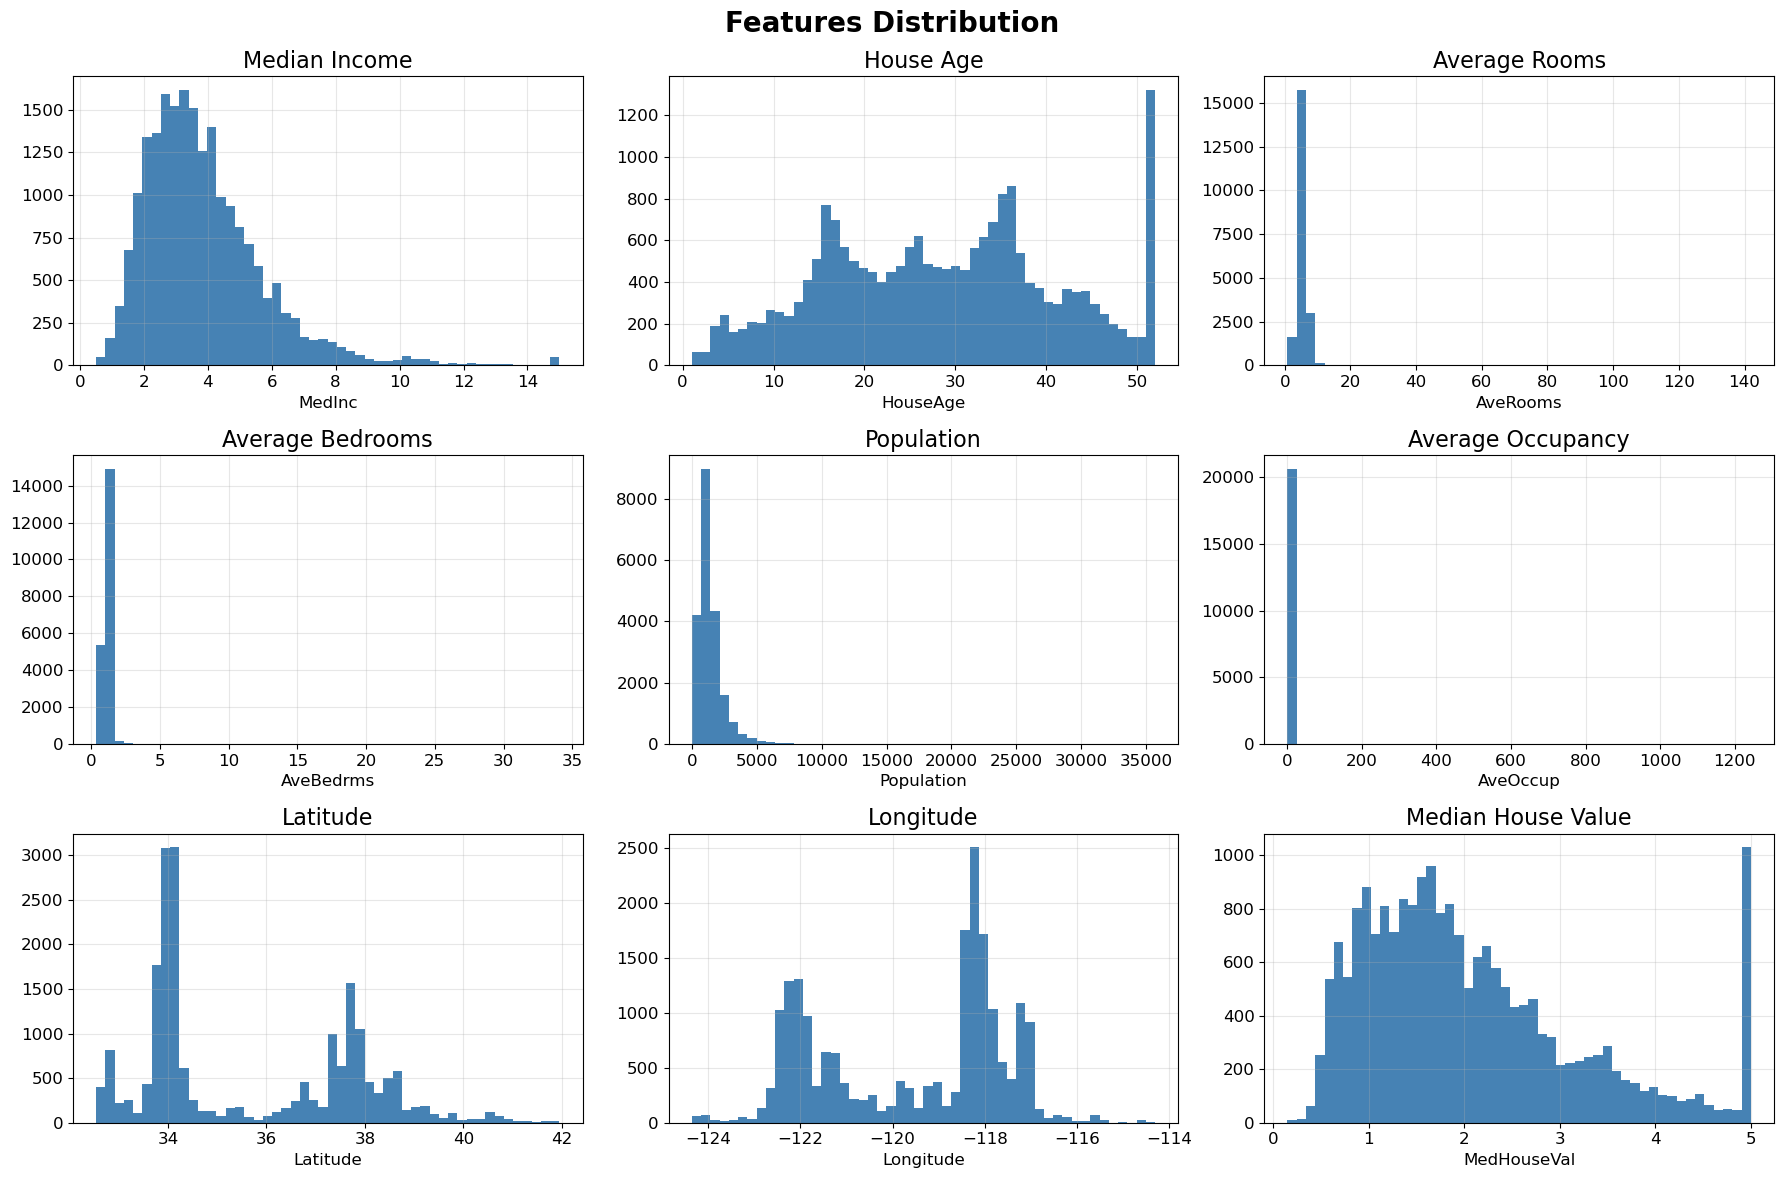

In [7]:
df_name = {
    'MedInc': 'Median Income',
    'HouseAge': 'House Age',
    'AveRooms': 'Average Rooms',
    'AveBedrms': 'Average Bedrooms',
    'Population': 'Population',
    'AveOccup': 'Average Occupancy',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'MedHouseVal': 'Median House Value'
}

fig, axes = plt.subplots(3, 3, figsize = (18, 12))
fig.suptitle("Features Distribution", fontsize = 20, fontweight = 'bold')

for i , (column, name) in enumerate(df_name.items()):
    if i >= 9:
        break

    row, col = i//3, i % 3
    ax = axes[row, col]

    ax.hist(df[column], bins = 50, color = 'steelblue')
    ax.set_title(name, fontsize = 16)
    ax.set_xlabel(column)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
# Save the figure
plt.savefig("outputs/features_histogram_plot.png", dpi = 300)
plt.show()

### 2.6 Create Test Set 

We must create our test set BEFORE any exploratory analysis to prevent data leakage and ensure unbiased evaluation. This is a fundamental ML engineering principle.

In this case 'Median Income' is an important attribute for 'Madian House Value' so we are gonna do stratified sampling with 'Median Incom'. This ensures our train/test sets have similar income distributions.

In [8]:
# Min and Max of 'MedInc'
print(f"((min, max) = {(df['MedInc'].min(), df['MedInc'].max())}")

((min, max) = (np.float64(0.4999), np.float64(15.0001))


Income Category Distribution


income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64


Percentages


income_cat
1     3.98
2    31.88
3    35.06
4    17.63
5    11.44
Name: count, dtype: float64

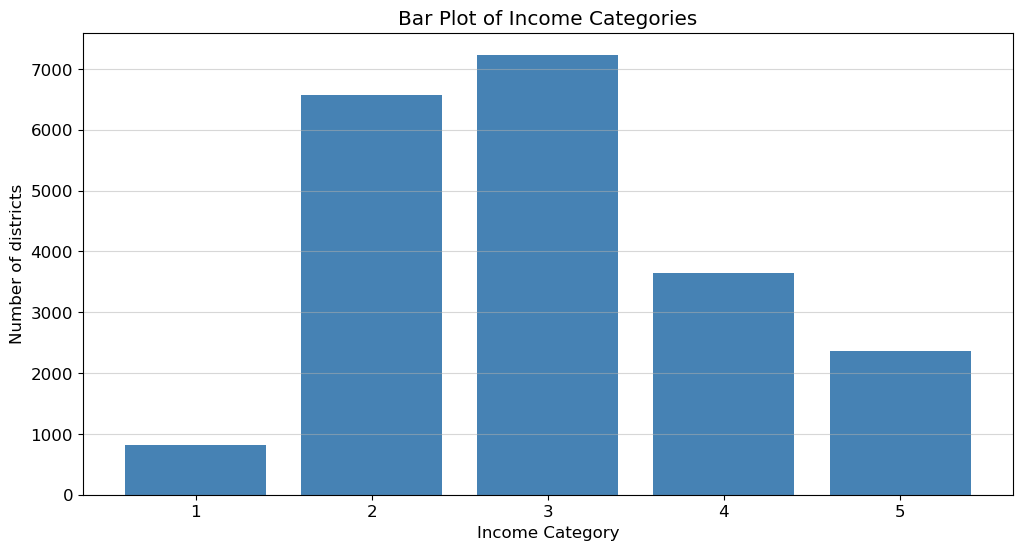

In [9]:
# Let's copy and and store the original incase ...
df_orginal = df.copy()

# Create income categories based on 'MedInc'
bins = [0, 1.5, 3, 4.5, 6, np.inf]
labels = [1, 2, 3, 4, 5]
df['income_cat'] = pd.cut(df['MedInc'], bins = bins, labels = labels)

print("Income Category Distribution")
income_cat_dist = df['income_cat'].value_counts().sort_index()
display(income_cat_dist)

print("\nPercentages")
income_cat_dist_per = (income_cat_dist/len(df) * 100).round(2)
display(income_cat_dist_per)

# Let's draw the bar plot for median income category
plt.figure(figsize = (12, 6))

plt.bar(income_cat_dist.index, income_cat_dist.values, color = 'steelblue')
plt.title("Bar Plot of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.grid(True, alpha = 0.5, axis = 'y')

plt.savefig("outputs/bar_plot_of_income_categories")
plt.show()

In [10]:
# Perform stratifies train-test split
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify=df["income_cat"], random_state = 42)

print("Stratified split completed successfully")
print(f"Training set size : {len(strat_train_set)}")
print(f"Training set size : {len(strat_test_set)}")

Stratified split completed successfully
Training set size : 16512
Training set size : 4128


In [11]:
# Verify stratification worked correctly
print(f"\nStratification Verification:")
print("Income category proportions comparison:")
print(f"{'Category':<10} {'Overall':<10} {'Train':<10} {'Test':<10} {'Diff':<10}")
print("-" * 50)

for category in [1, 2, 3, 4, 5]:
    overall_prop = (df['income_cat'] == category).mean()
    train_prop = (strat_train_set['income_cat'] == category).mean()
    test_prop = (strat_test_set['income_cat'] == category).mean()
    diff = abs(overall_prop - test_prop)
    
    print(f"{category:<10} {overall_prop:<10.3f} {train_prop:<10.3f} {test_prop:<10.3f} {diff:<10.3f}")


Stratification Verification:
Income category proportions comparison:
Category   Overall    Train      Test       Diff      
--------------------------------------------------
1          0.040      0.040      0.040      0.000     
2          0.319      0.319      0.319      0.000     
3          0.351      0.351      0.351      0.000     
4          0.176      0.176      0.176      0.000     
5          0.114      0.114      0.114      0.000     


In [12]:
# Clean up and prepare the final train and split test
# Remove the the helper 'income_cat' column
df = df.drop('income_cat', axis = 'columns')
strat_train_set = strat_train_set.drop('income_cat', axis = 'columns')
strat_test_set = strat_test_set.drop('income_cat', axis = 'columns')

# Separate features and target
X_train = strat_train_set.drop('MedHouseVal', axis = 'columns')
y_train = strat_train_set['MedHouseVal'].copy()

X_test = strat_test_set.drop('MedHouseVal', axis = 'columns') 
y_test = strat_test_set['MedHouseVal'].copy()

print("Final Datasets Prepared:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Final Datasets Prepared:
X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


### 2.7 Data Backup and Version Control

In [13]:
# Save dataset splits for reproducibility (optional but professional)
print("Dataset Split Summary:")
print("=" * 25)
print("Dataset splits created with the following parameters:")
print(f"  - Random seed: 42")
print(f"  - Test size: 20%")
print(f"  - Stratification: Income categories (5 bins)")
print(f"  - Split method: test_train_split")
print(f"  - Date created: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n Key Decisions Made:")
print(f"  - Used MedInc for stratification (strongest predictor)")
print(f"  - 5 income categories to balance granularity vs sample size")
print(f"  - 80/20 split follows industry standard")
print(f"  - Stratified split ensures representative samples")

print(f"\n  CRITICAL: Test set is now FROZEN until final evaluation")
print(f"   All EDA and model development uses ONLY the training set")

Dataset Split Summary:
Dataset splits created with the following parameters:
  - Random seed: 42
  - Test size: 20%
  - Stratification: Income categories (5 bins)
  - Split method: test_train_split
  - Date created: 2025-09-11 13:02:46

 Key Decisions Made:
  - Used MedInc for stratification (strongest predictor)
  - 5 income categories to balance granularity vs sample size
  - 80/20 split follows industry standard
  - Stratified split ensures representative samples

  CRITICAL: Test set is now FROZEN until final evaluation
   All EDA and model development uses ONLY the training set


## 3. Exploratory Data Analysis (EDA)

### 3.1 EDA Objectives & Strategy

**EDA Goals:**
1. **Understand data distributions** - Are features normally distributed? Any outliers?
2. **Discover relationships** - How do features correlate with our target?
3. **Identify patterns** - Geographic, temporal, or demographic patterns
4. **Guide feature engineering** - What new features might be valuable?
5. **Inform modeling decisions** - Which algorithms might work best?

**CRITICAL**: We perform EDA ONLY on the training set to prevent data leakage.

**EDA Framework:**
- **Univariate Analysis**: Each feature individually
- **Bivariate Analysis**: Feature relationships with target
- **Multivariate Analysis**: Complex feature interactions
- **Geographic Analysis**: Spatial patterns (unique to this dataset)

In [14]:
# Prepare the train dataset for EDA
# Create a copy of training data for EDA
# This prevents accidental modifications to our clean splits
eda_data = strat_train_set.copy()

print("EDA dataset: ")
print(f"Shape: {eda_data.shape}")
print(f"Features: {eda_data.columns.tolist()}")
print("Target: MedHouseVal")

EDA dataset: 
Shape: (16512, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Target: MedHouseVal


In [15]:
# Basic data check
print("Basic Data Check:")
print("=" * 50)
print(f"Missing Values: \n{eda_data.isna().sum()}")
print("=" * 50)
print(f"   Duplicate rows: {eda_data.duplicated().sum()}")

Basic Data Check:
Missing Values: 
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
   Duplicate rows: 0


### 3.2 Univariate Analysis - Understanding Each Feature

We'll analyze each feature's distribution, outliers, and basic statistics. This helps us understand data quality and informs preprocessing decisions.

UNIVARIATE ANALYSIS:


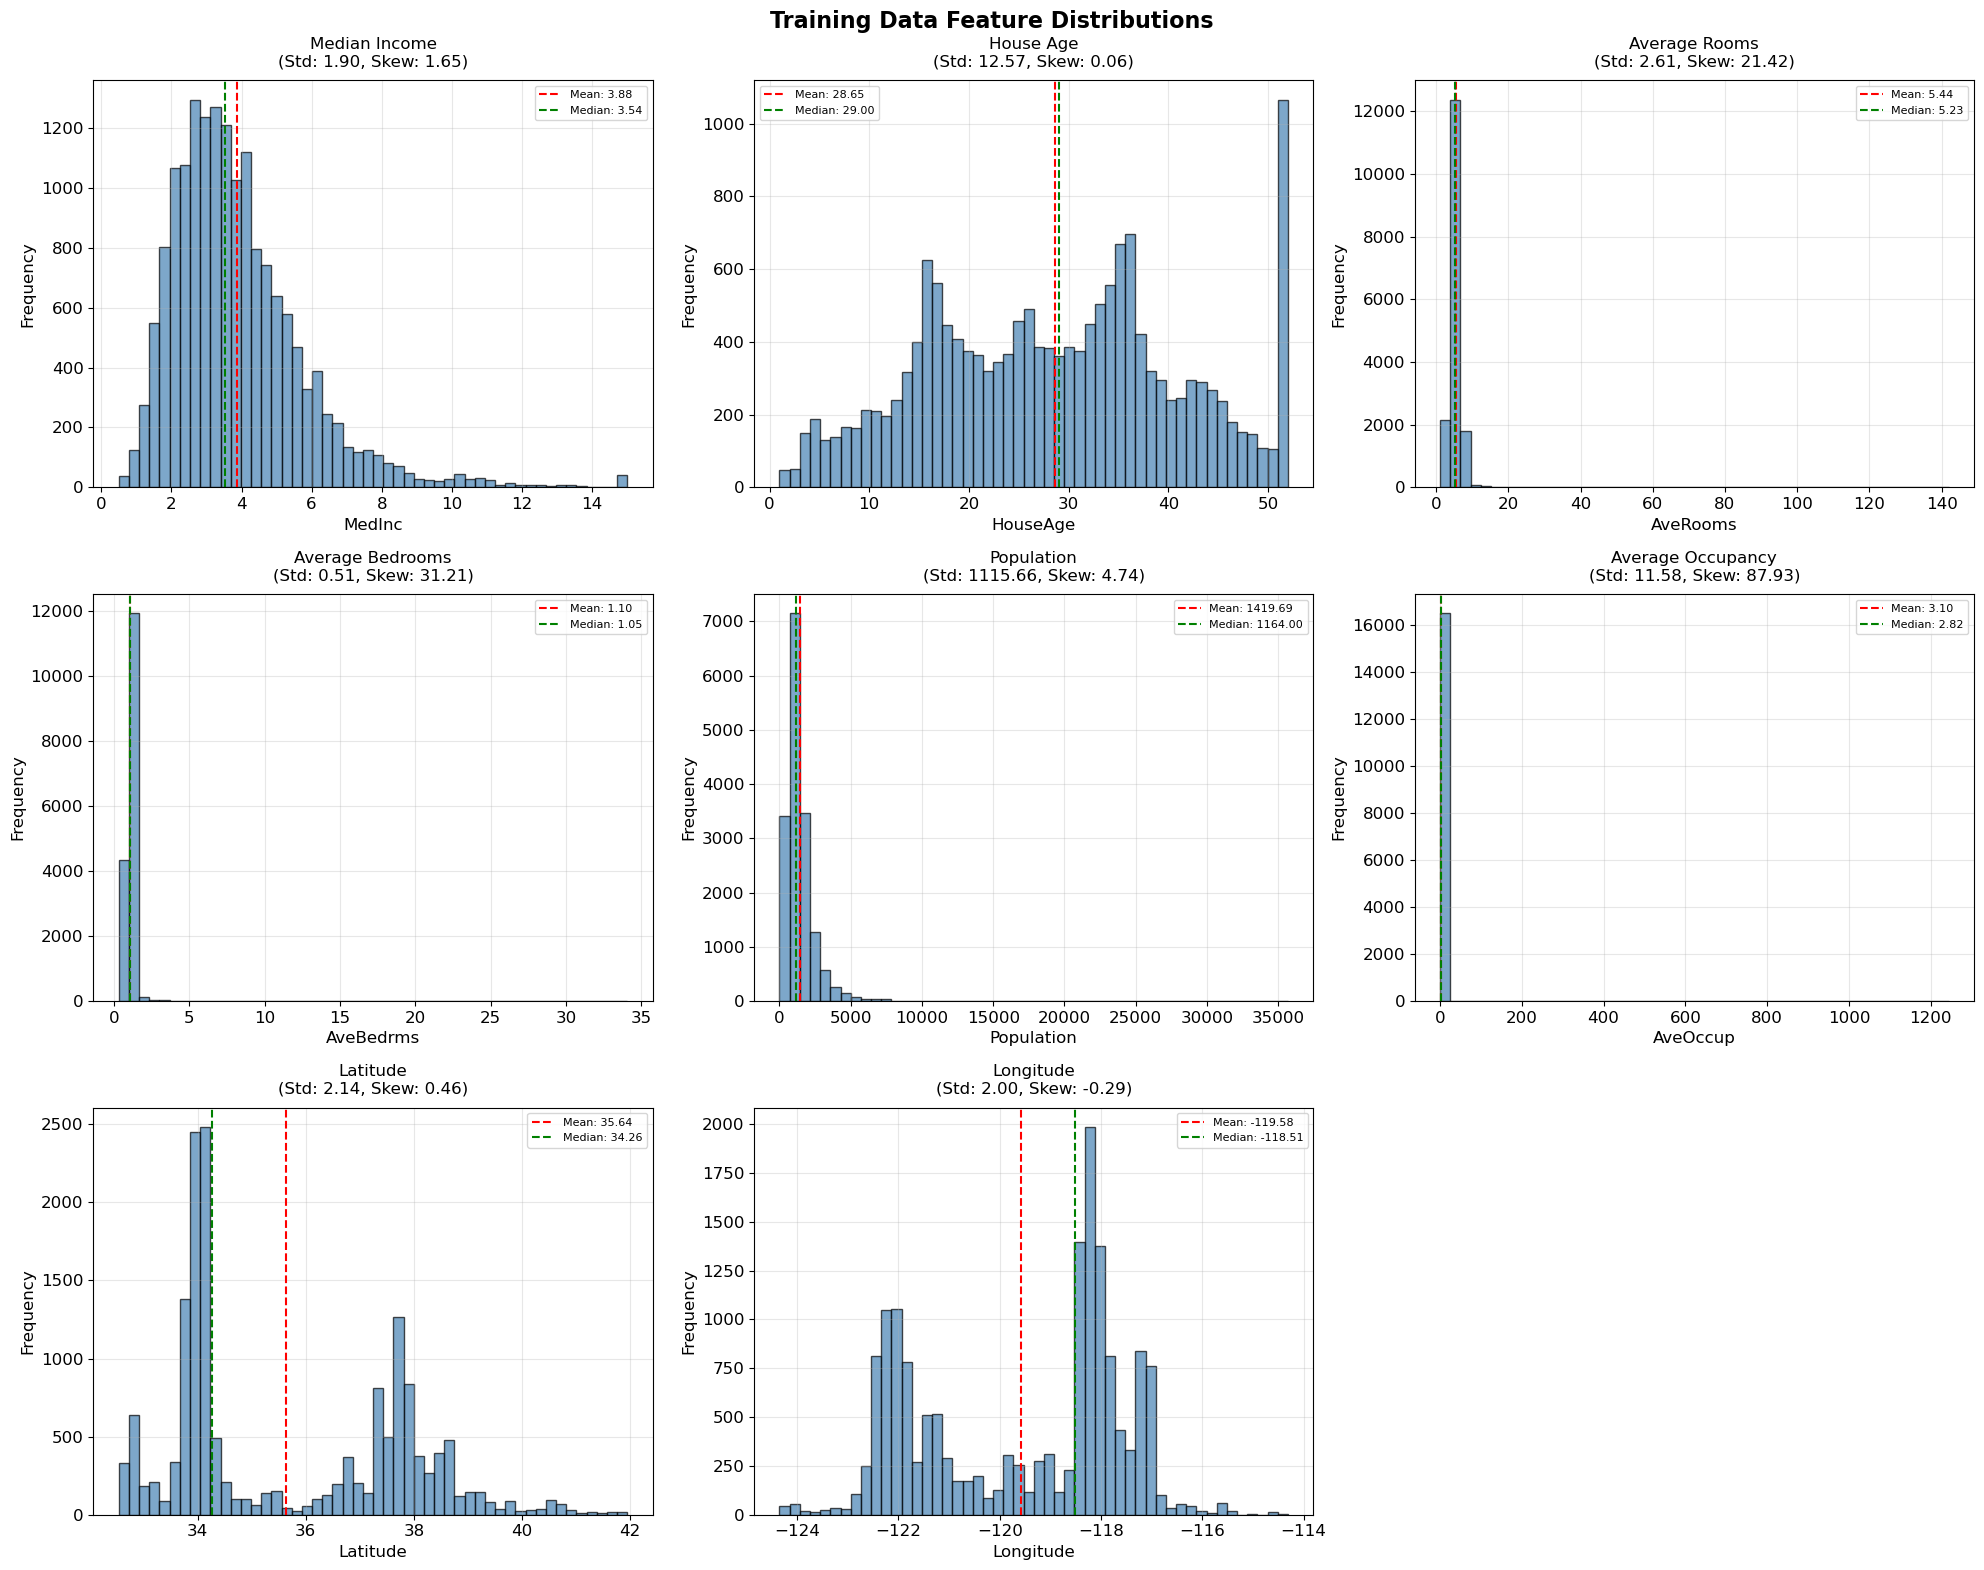

In [16]:
print("UNIVARIATE ANALYSIS:")
print("=" * 50)

# Setup plotting grid
fig, axes = plt.subplots(3, 3, figsize = (20, 16))
fig.suptitle("Training Data Feature Distributions", fontsize = 16, fontweight = 'bold')

features = {
    'MedInc': 'Median Income',
    'HouseAge': 'House Age',
    'AveRooms': 'Average Rooms',
    'AveBedrms': 'Average Bedrooms',
    'Population': 'Population',
    'AveOccup': 'Average Occupancy',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
}
axes_flat = axes.flatten()

for i, (feature, name) in enumerate(features.items()):
    if i < len(axes_flat):
        ax = axes_flat[i]

        ax.hist(eda_data[feature], bins = 50, alpha = 0.7, edgecolor = 'black', color = 'steelblue')

        # basic statistical values
        mean = eda_data[feature].mean()
        median = eda_data[feature].median()
        std = eda_data[feature].std()

        ax.axvline(mean, color = 'red', linestyle = '--', label = f"Mean: {mean:.2f}")
        ax.axvline(median, color = 'green', linestyle = '--', label = f"Median: {median:.2f}")

        # Formatting
        ax.set_title(f'{name}\n(Std: {std:.2f}, Skew: {eda_data[feature].skew():.2f})', 
                    fontsize=12, pad=10)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

# Remove empty subplots
for j in range(len(features), len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
fig.savefig("outputs/training_data_feature_distributions.png", dpi = 300)
plt.show()

In [17]:
print("DETAILED STATISTICAL SUMMARY:")
print("=" * 150)

def stat_summary(df):
    """Create a detailed statistical summary"""
    stats = df.describe().T
    stats['missing'] = df.isna().sum()
    stats['missing_pct'] = (df.isna().sum()/len(df)) * 100
    stats['skewness'] = df.skew()
    stats['kurtosis'] = df.kurtosis()
    stats['range'] = stats['max'] - stats['min']
    stats['iqr'] = stats['75%'] - stats['25%']

    return stats
dtail_stats = stat_summary(eda_data)
print("Complete Statistical Summary")
display(dtail_stats.round(3))

DETAILED STATISTICAL SUMMARY:
Complete Statistical Summary


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct,skewness,kurtosis,range,iqr
MedInc,16512.0,3.876,1.905,0.500,2.567,3.542,4.745,15.000,0,0.0,1.653,4.933,14.500,2.178
HouseAge,16512.0,28.653,12.575,1.000,18.000,29.000,37.000,52.000,0,0.0,0.059,-0.797,51.000,19.000
AveRooms,16512.0,5.440,2.612,1.130,4.442,5.232,6.056,141.909,0,0.0,21.423,879.451,140.779,1.614
AveBedrms,16512.0,1.098,0.507,0.333,1.006,1.049,1.099,34.067,0,0.0,31.208,1552.240,33.733,0.093
Population,16512.0,1419.687,1115.663,3.000,784.000,1164.000,1719.000,35682.000,0,0.0,4.742,71.792,35679.000,935.000
AveOccup,16512.0,3.096,11.585,0.692,2.431,2.818,3.281,1243.333,0,0.0,87.928,8600.213,1242.641,0.850
Latitude,16512.0,35.639,2.138,32.540,33.940,34.260,37.720,41.950,0,0.0,0.461,-1.117,9.410,3.780
Longitude,16512.0,-119.576,2.002,-124.350,-121.800,-118.510,-118.010,-114.310,0,0.0,-0.294,-1.335,10.040,3.790
MedHouseVal,16512.0,2.070,1.157,0.150,1.198,1.795,2.639,5.000,0,0.0,0.987,0.334,4.850,1.441


In [18]:
# Identify potential issues
print(f"\nDATA QUALITY INSIGHTS:")
print("=" * 30)

for feature in eda_data.columns:
    skew = abs(eda_data[feature].skew())
    kurtosis = abs(eda_data[feature].kurtosis())
    
    issues = []
    if skew > 2:
        issues.append(f"Highly skewed ({skew:.2f})")
    elif skew > 1:
        issues.append(f"Moderately skewed ({skew:.2f})")
    
    if kurtosis > 7:
        issues.append(f"Heavy tails (kurtosis: {kurtosis:.2f})")

    # Check for potential outliers using IQR method
    Q1 = eda_data[feature].quantile(0.25)
    Q3 = eda_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((eda_data[feature] < lower_bound) | (eda_data[feature] > upper_bound)).sum()
    
    if outliers > len(eda_data) * 0.05:  # More than 5% outliers
        issues.append(f"{outliers} potential outliers ({outliers/len(eda_data)*100:.1f}%)")
    
    if issues:
        print(f"{feature}: {', '.join(issues)}")
    else:
        print(f"{feature}: Good distribution")


DATA QUALITY INSIGHTS:
MedInc: Moderately skewed (1.65)
HouseAge: Good distribution
AveRooms: Highly skewed (21.42), Heavy tails (kurtosis: 879.45)
AveBedrms: Highly skewed (31.21), Heavy tails (kurtosis: 1552.24), 1149 potential outliers (7.0%)
Population: Highly skewed (4.74), Heavy tails (kurtosis: 71.79), 962 potential outliers (5.8%)
AveOccup: Highly skewed (87.93), Heavy tails (kurtosis: 8600.21)
Latitude: Good distribution
Longitude: Good distribution
MedHouseVal: 882 potential outliers (5.3%)


### 3.3 Target Variable

Understanding our target variable (MedHouseVal) is crucial for model selection and evaluation strategy.

In [19]:
print("Target Variable Analysis")
print("=" * 50)

target = y_train.copy()

# Detailed target statistics
print("Target Variable: MedHouseVal (Median House Value in $100k)")
print(f"\nBasic Statistics: ")
display(target.describe())
print(f"Range: ${target.min():.1f}k - ${target.max():.1f}k")
print(f"Actual dollar range: ${target.min()*100000:,.0f} - ${target.max()*100000:,.0f}")
print(f"Mean: ${target.mean():.2f}k (${target.mean()*100000:,.0f})")
print(f"Median: ${target.median():.2f}k (${target.median()*100000:,.0f})")
print(f"Standard Deviation: ${target.std():.2f}k (${target.std()*100000:,.0f})")

Target Variable Analysis
Target Variable: MedHouseVal (Median House Value in $100k)

Basic Statistics: 


count    16512.000000
mean         2.070053
std          1.157013
min          0.149990
25%          1.198000
50%          1.795000
75%          2.639000
max          5.000010
Name: MedHouseVal, dtype: float64

Range: $0.1k - $5.0k
Actual dollar range: $14,999 - $500,001
Mean: $2.07k ($207,005)
Median: $1.79k ($179,500)
Standard Deviation: $1.16k ($115,701)


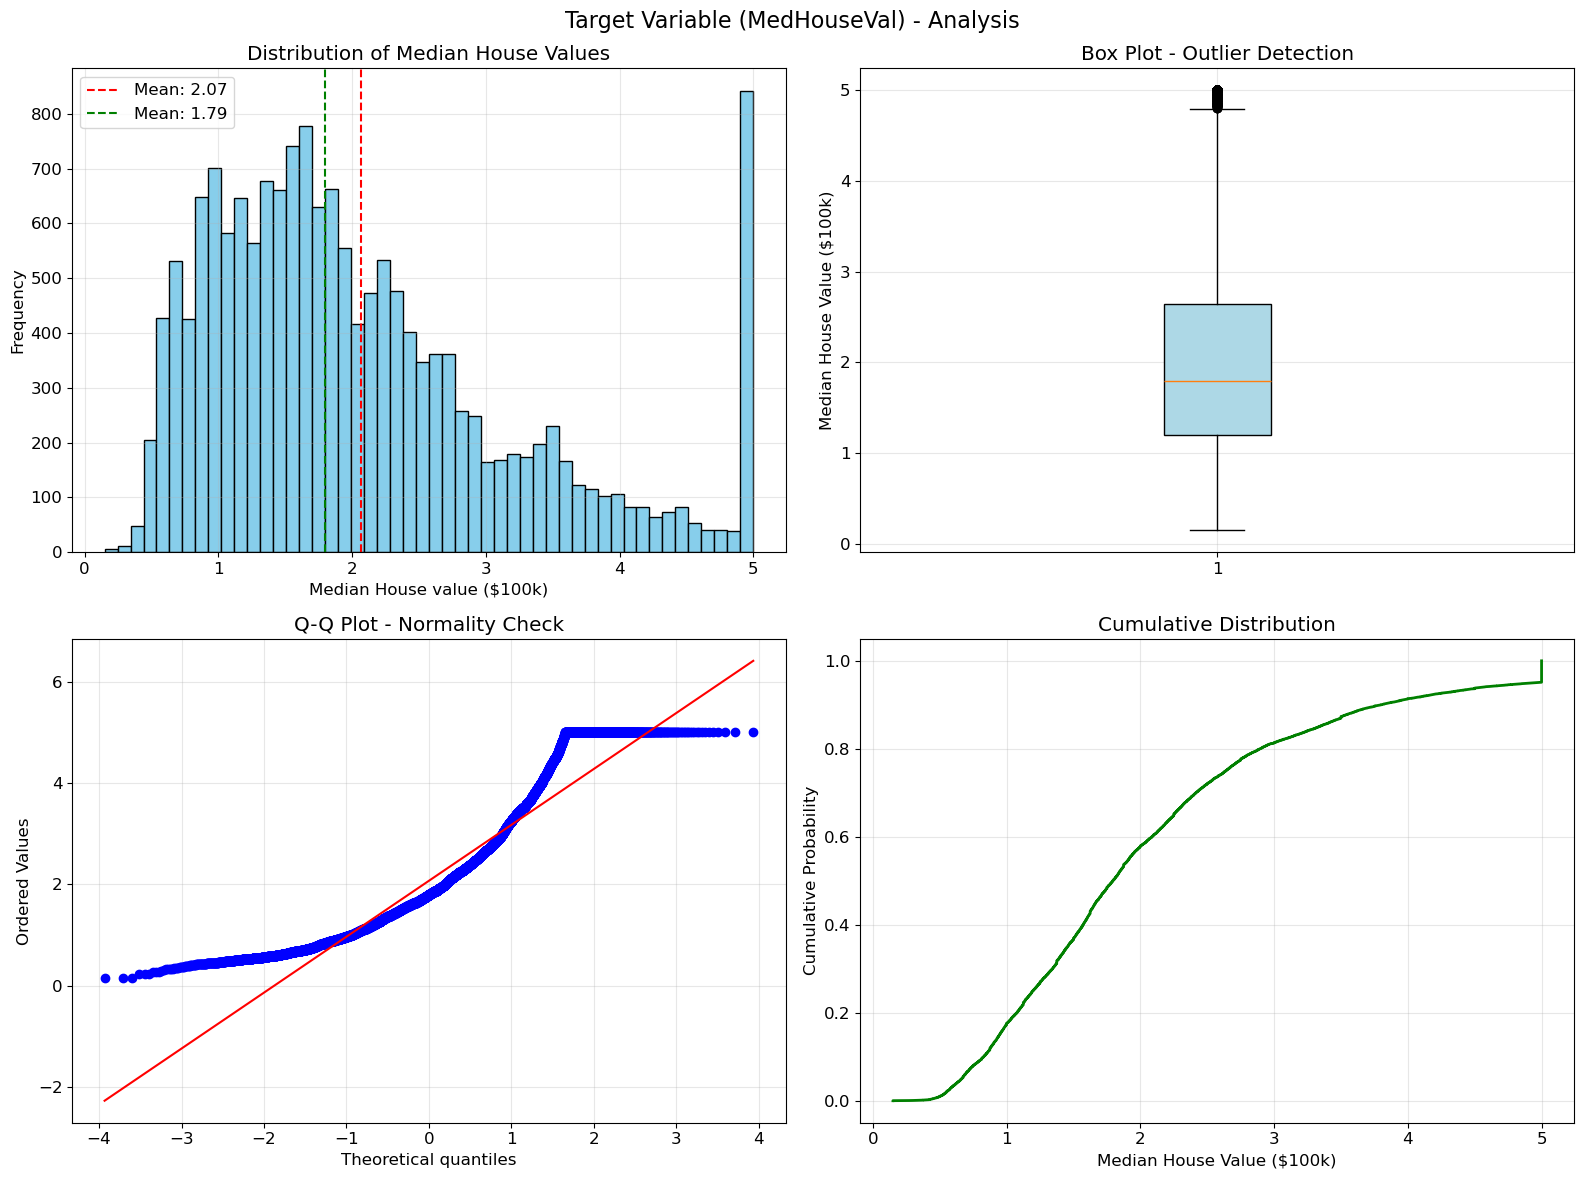

In [20]:
# Create target visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle("Target Variable (MedHouseVal) - Analysis", fontsize = 16)

# 1. Distribution histogram
ax1.hist(target, bins = 50, color = 'skyblue', edgecolor = 'black')
ax1.axvline(target.mean(), color = 'red', linestyle = '--', label = f"Mean: {target.mean():.2f}")
ax1.axvline(target.median(), color = 'green', linestyle = '--', label = f"Mean: {target.median():.2f}")
ax1.set_title("Distribution of Median House Values")
ax1.set_xlabel("Median House value ($100k)")
ax1.set_ylabel("Frequency")
ax1.legend()
ax1.grid(True, alpha = 0.3)

# 2. Box plot for outlier detection
box_plot = ax2.boxplot(target, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.set_title('Box Plot - Outlier Detection')
ax2.set_ylabel('Median House Value ($100k)')
ax2.grid(True, alpha=0.3)

# 3. Q-Q plot for normality check
from scipy import stats
stats.probplot(target, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot - Normality Check')
ax3.grid(True, alpha=0.3)

# 4. Cumulative distribution
sorted_target = np.sort(target)
cumulative = np.arange(1, len(sorted_target) + 1) / len(sorted_target)
ax4.plot(sorted_target, cumulative, color='green', linewidth=2)
ax4.set_title('Cumulative Distribution')
ax4.set_xlabel('Median House Value ($100k)')
ax4.set_ylabel('Cumulative Probability')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig("outputs/target_variable_analysis.png", dpi = 300)
plt.show()

In [21]:
# Skewness and kurtosis
skew_val = target.skew()
kurt_val = target.kurtosis()
print(f"Skewness: {skew_val:.3f} ({'Right-skewed' if skew_val > 0 else 'Left-skewed'})")
print(f"Kurtosis: {kurt_val:.3f} ({'Heavy-tailed' if kurt_val > 3 else 'Light-tailed'})")

# Outlier analysis
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((target < lower_bound) | (target > upper_bound)).sum()

print(f"\nOutlier Analysis (IQR method):")
print(f"Lower bound: ${lower_bound:.2f}k")
print(f"Upper bound: ${upper_bound:.2f}k") 
print(f"Outliers: {outliers} ({outliers/len(target)*100:.1f}%)")

# Price distribution insights
print(f"\nPrice Range Analysis:")
print(f"Budget homes (<$200k): {(target < 2).sum()} ({(target < 2).mean()*100:.1f}%)")
print(f"Mid-range ($200k-$400k): {((target >= 2) & (target < 4)).sum()} ({((target >= 2) & (target < 4)).mean()*100:.1f}%)")
print(f"Premium homes (>$400k): {(target >= 4).sum()} ({(target >= 4).mean()*100:.1f}%)")
print(f"Luxury homes (>=$500k): {(target >= 5).sum()} ({(target >= 5).mean()*100:.1f}%)")

Skewness: 0.987 (Right-skewed)
Kurtosis: 0.334 (Light-tailed)

Outlier Analysis (IQR method):
Lower bound: $-0.96k
Upper bound: $4.80k
Outliers: 882 (5.3%)

Price Range Analysis:
Budget homes (<$200k): 9527 (57.7%)
Mid-range ($200k-$400k): 5548 (33.6%)
Premium homes (>$400k): 1437 (8.7%)
Luxury homes (>=$500k): 809 (4.9%)


### 3.4 Bivariate Analysis - Feature-Target Relationships

Now we analyze how each feature relates to our target variable. This is crucial for:
- **Feature selection** - Which features are most predictive?
- **Model choice** - Linear vs non-linear relationships?
- **Feature engineering** - What transformations might help?
- **Business insights** - What drives house prices?

FEATURE -TARGET CORRELATION ANALYSIS
Features ranked by correlation with MedHouseVal:


MedInc        0.687151
AveRooms      0.146255
Latitude     -0.142673
HouseAge      0.114146
Longitude    -0.047466
AveBedrms    -0.043294
Population   -0.026882
AveOccup     -0.021991
Name: MedHouseVal, dtype: float64

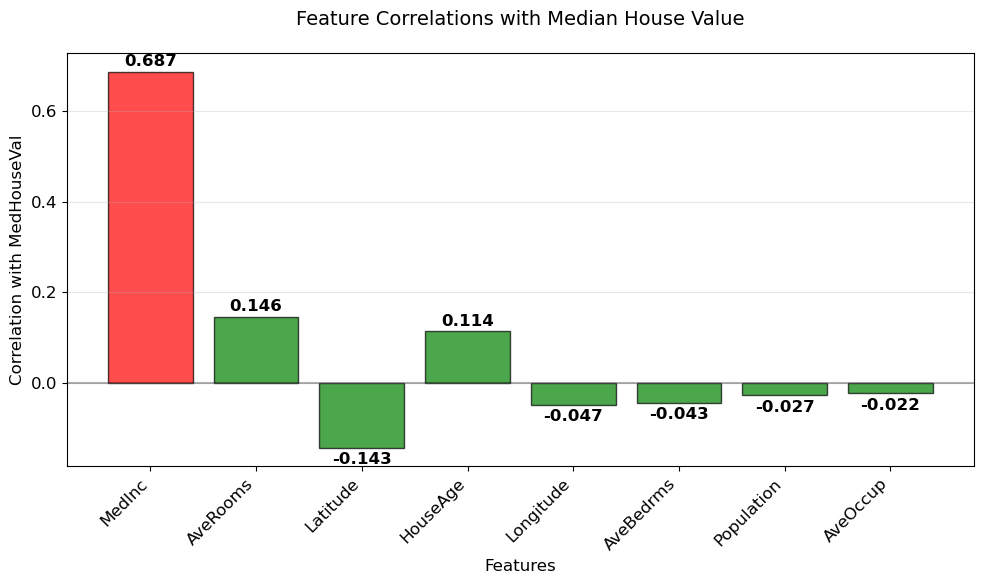

In [22]:
print("FEATURE -TARGET CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation with target
target_corr = eda_data.corr()['MedHouseVal'].drop('MedHouseVal').sort_values(key = abs, ascending = False)
print("Features ranked by correlation with MedHouseVal:")
print("=" * 45)
display(target_corr)

# Create correlation visualization
# Create correlation visualization
plt.figure(figsize=(10, 6))
colors = ['red' if abs(x) >= 0.5 else 'orange' if abs(x) >= 0.3 else 'green' for x in target_corr.values]
bars = plt.bar(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for i, (feature, value) in enumerate(target_corr.items()):
    plt.text(i, value + (0.005 if value > 0 else -0.01), f'{value:.3f}', 
             ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

plt.title('Feature Correlations with Median House Value', fontsize=14, pad=20)
plt.xlabel('Features')
plt.ylabel('Correlation with MedHouseVal')
plt.xticks(range(len(target_corr)), target_corr.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
fig.savefig("outputs/feature_target_correlation.png", dpi = 300)
plt.show()


FEATURE-TARGET SCATTER PLOT ANALYSIS


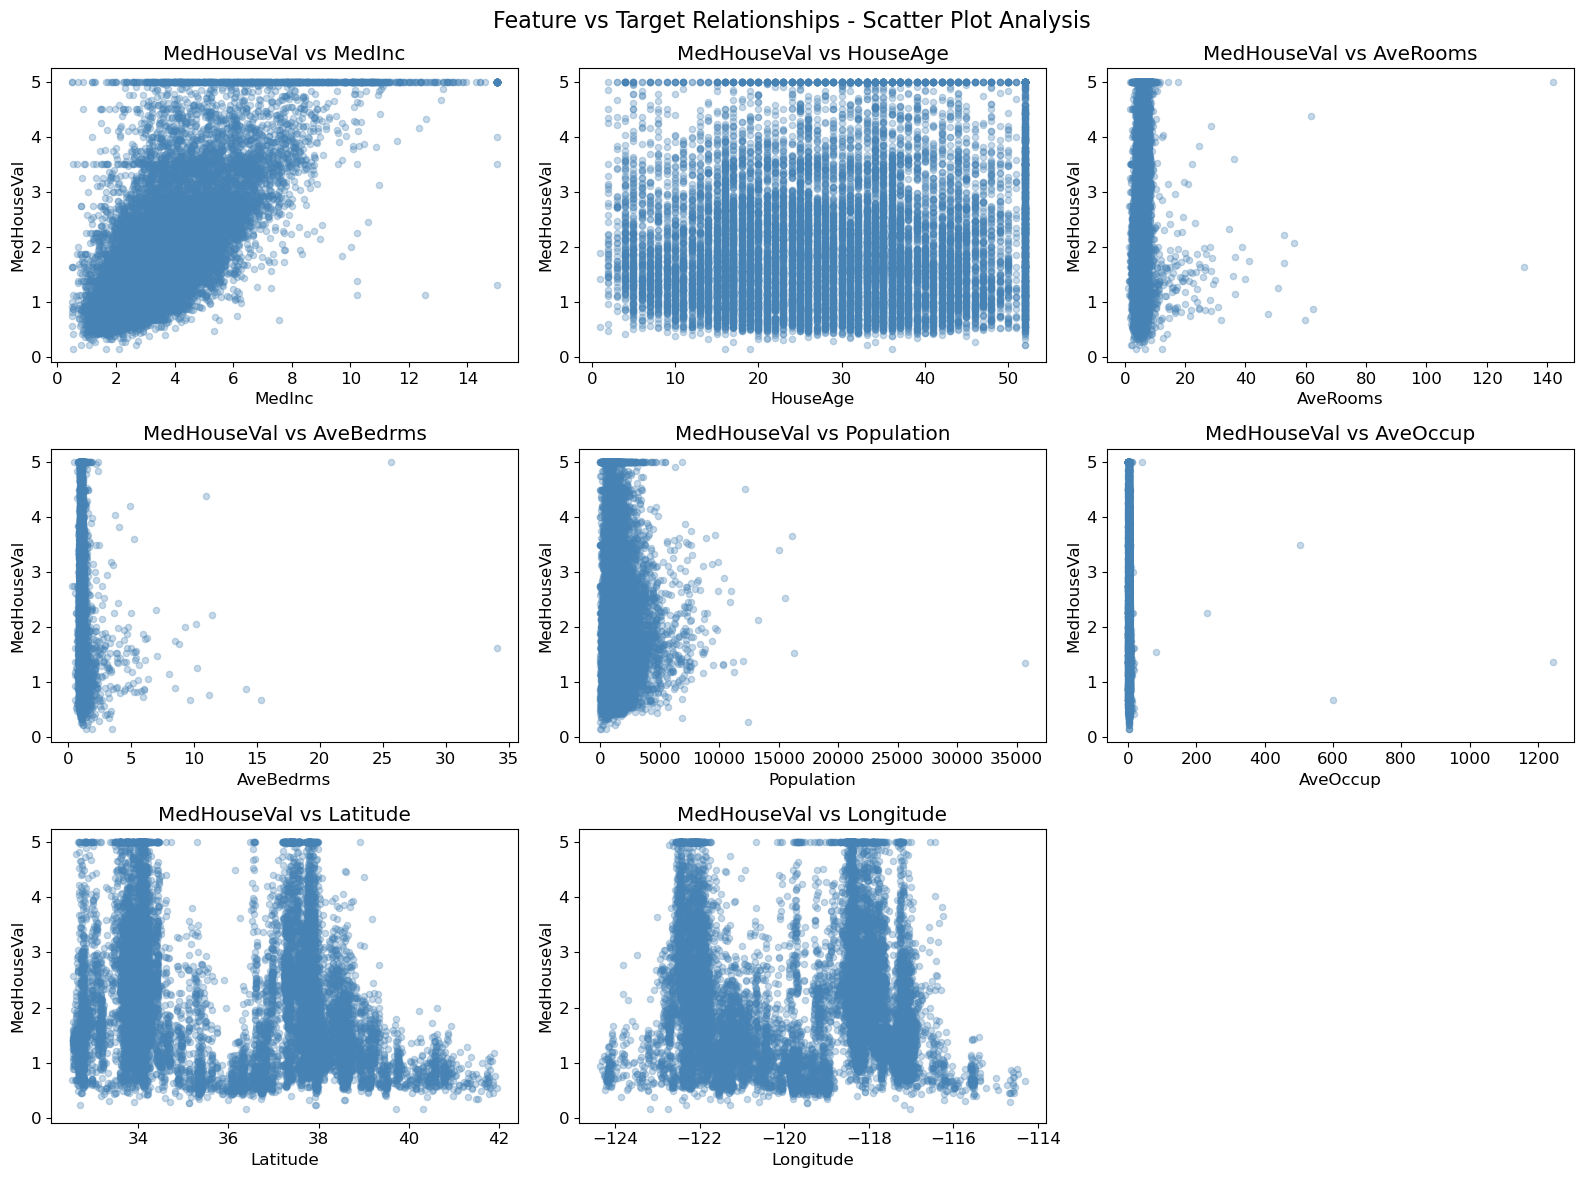

In [23]:
# Detailed scatter plots for feature-target relationships
print("\nFEATURE-TARGET SCATTER PLOT ANALYSIS")
print("=" * 150)

# Create scatter plot matrix
fig, axes = plt.subplots(3, 3, figsize = (16, 12))
fig.suptitle("Feature vs Target Relationships - Scatter Plot Analysis", fontsize = 16)

features = [col for col in eda_data.columns if col != 'MedHouseVal']
axes_flatten = axes.flatten()

for i, feature in enumerate(features):
    ax = axes_flatten[i]

    ax.scatter(eda_data[feature], eda_data['MedHouseVal'], color = 'steelblue', alpha = 0.3, s = 20)
    ax.set_title(f"MedHouseVal vs {feature}")
    ax.set_ylabel('MedHouseVal')
    ax.set_xlabel(feature)
    
for j in range(len(features), len(axes_flat)):
    fig.delaxes(axes_flatten[j])

plt.tight_layout()
fig.savefig("outputs/feature_vs_target_relationships.png", dpi = 300)
plt.show()

### 3.5 Geographic Analysis - Spatial Patterns

California housing data has a unique geographic component. Let's analyze spatial patterns to understand regional price variations.

GEOGRAPHIC SPATIAL ANALYSIS


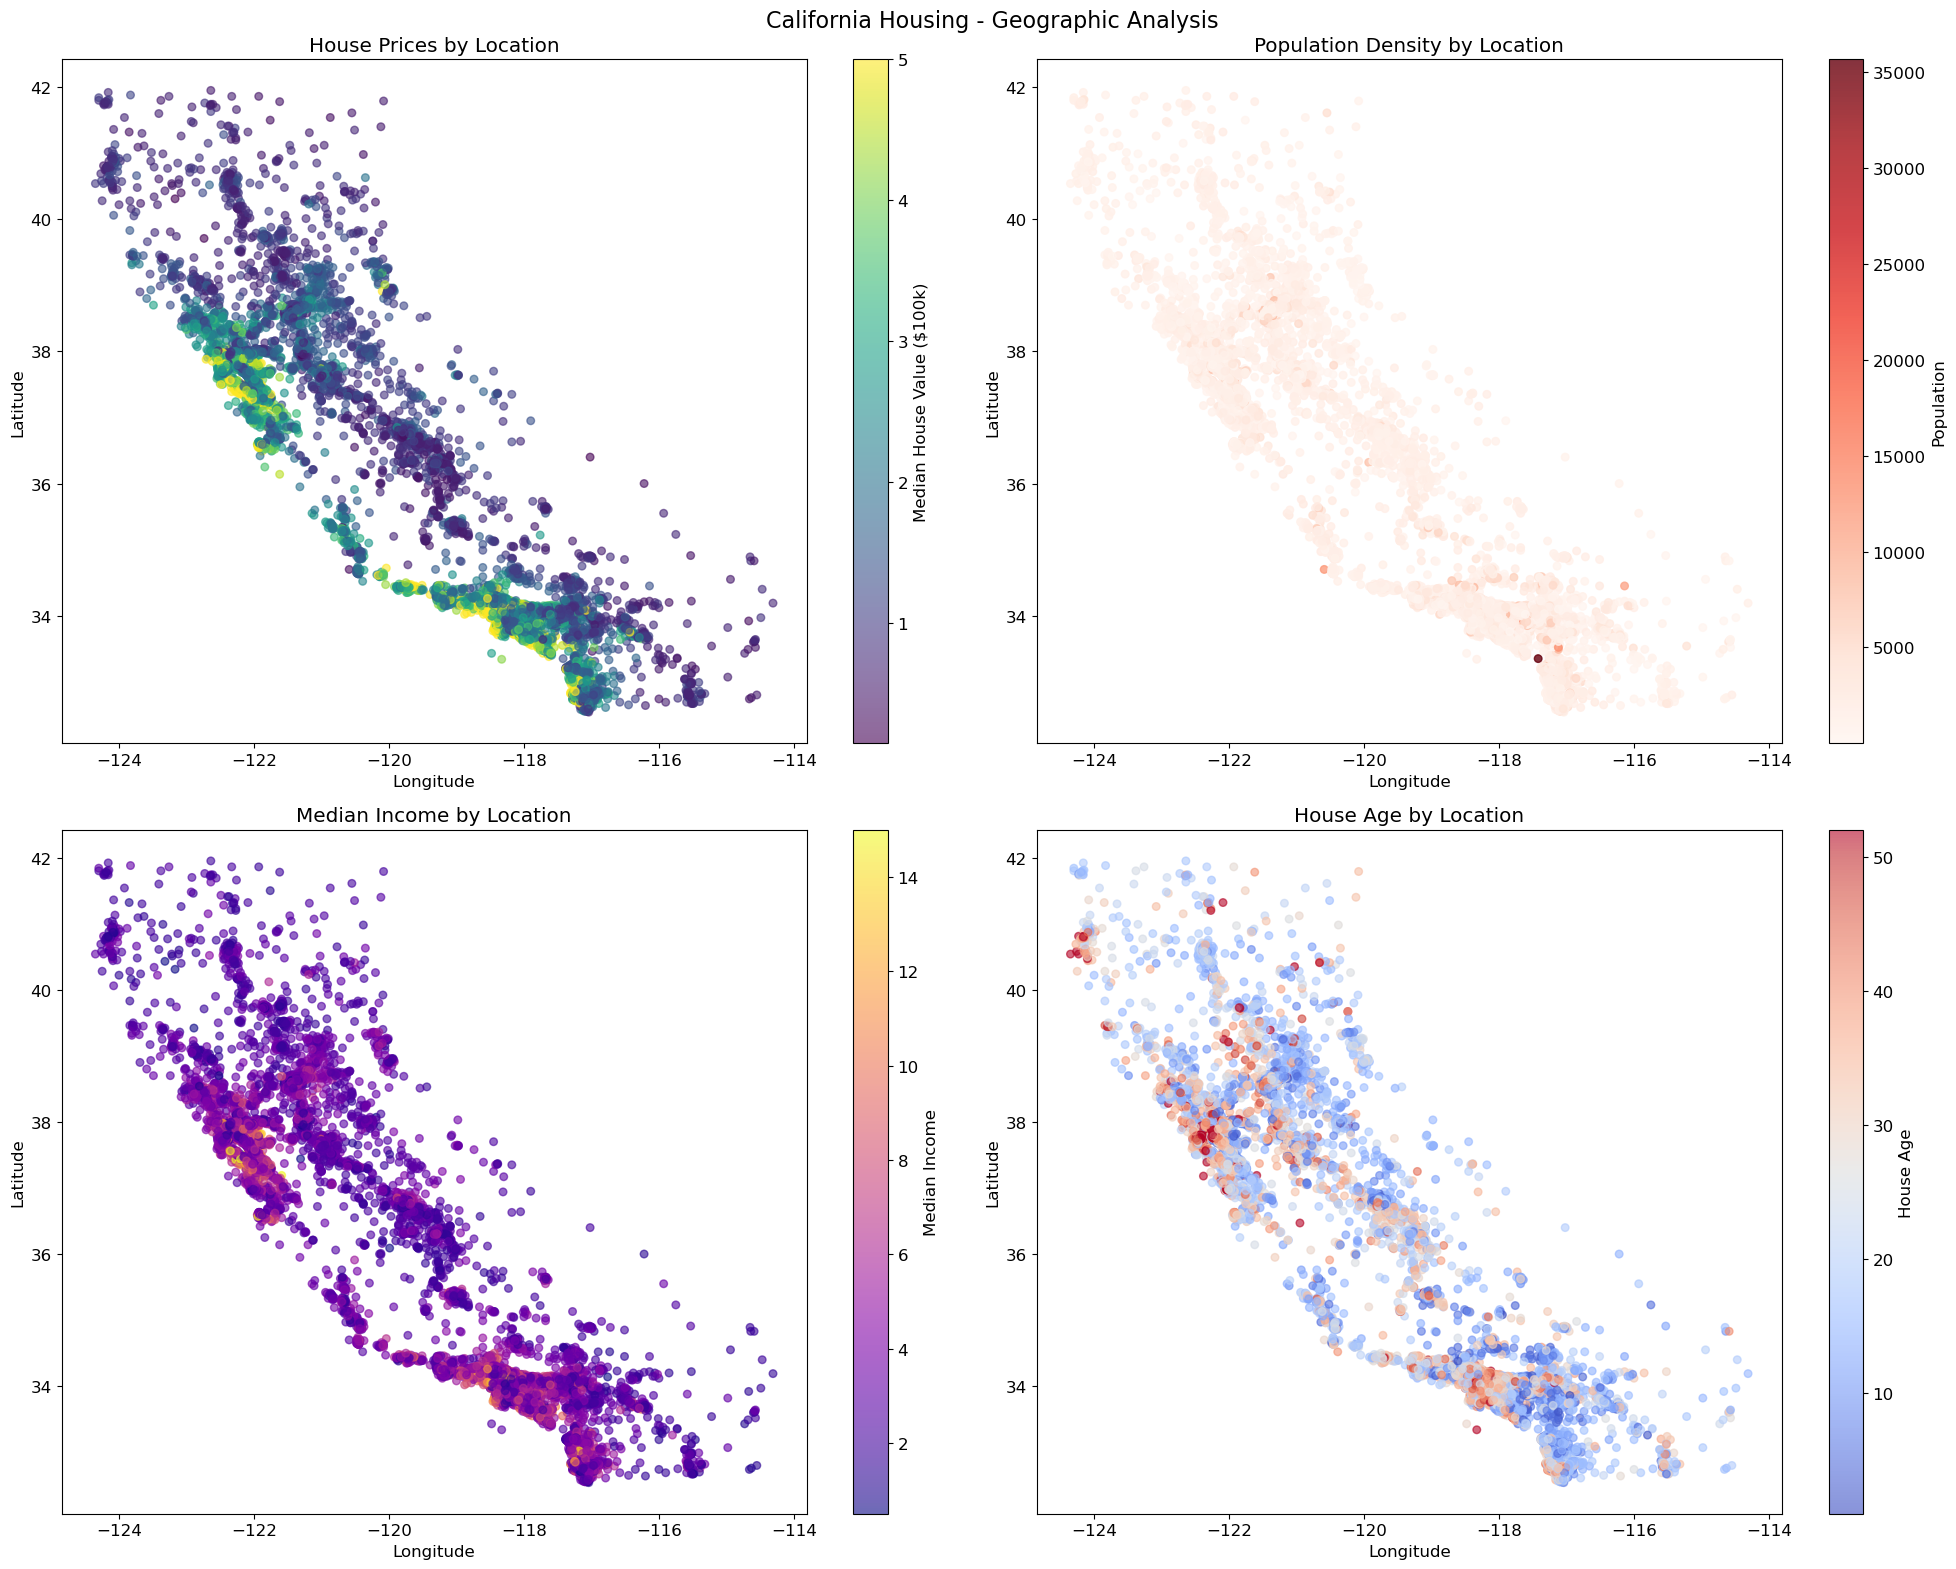

In [24]:
# Geographic analysis - California housing spatial patterns
print("GEOGRAPHIC SPATIAL ANALYSIS")
print("=" * 50)

# Create geographic visualization
fig, axes = plt.subplots(2, 2, figsize = (20, 16))
fig.suptitle("California Housing - Geographic Analysis", fontsize = 16)

# 1. Basic geographic scatter (Price Colored)
sc1 = axes[0, 0].scatter(eda_data['Longitude'], eda_data['Latitude'], c = eda_data['MedHouseVal'], cmap = 'viridis', alpha = 0.6, s = 30)
axes[0,0].set_title('House Prices by Location')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
plt.colorbar(sc1, ax=axes[0,0], label='Median House Value ($100k)')

# 2. Population density visualization
sc2 = axes[0,1].scatter(eda_data['Longitude'], eda_data['Latitude'], 
                           c=eda_data['Population'], cmap='Reds', 
                           alpha=0.8, s=30)
axes[0,1].set_title('Population Density by Location')
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
plt.colorbar(sc2, ax=axes[0,1], label='Population')

# 3. Income distribution geographic
sc3 = axes[1,0].scatter(eda_data['Longitude'], eda_data['Latitude'], 
                           c=eda_data['MedInc'], cmap='plasma', 
                           alpha=0.6, s=30)
axes[1,0].set_title('Median Income by Location')
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
plt.colorbar(sc3, ax=axes[1,0], label='Median Income')

# 4. House age patterns
sc4 = axes[1,1].scatter(eda_data['Longitude'], eda_data['Latitude'], 
                           c=eda_data['HouseAge'], cmap='coolwarm', 
                           alpha=0.6, s=30)
axes[1,1].set_title('House Age by Location')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
plt.colorbar(sc4, ax=axes[1,1], label='House Age')

plt.tight_layout()
fig.savefig("outputs/geographical_analysis.png", dpi = 300)
plt.show()

### 3.6 Multivariate Analysis - Feature Interactions & Complex Patterns

Multivariate analysis reveals:
- **Feature interactions** - How features work together
- **Multicollinearity** - Which features are redundant  
- **Complex patterns** - Non-obvious relationships

MULTIVARIATE CORRELATION ANALYSIS


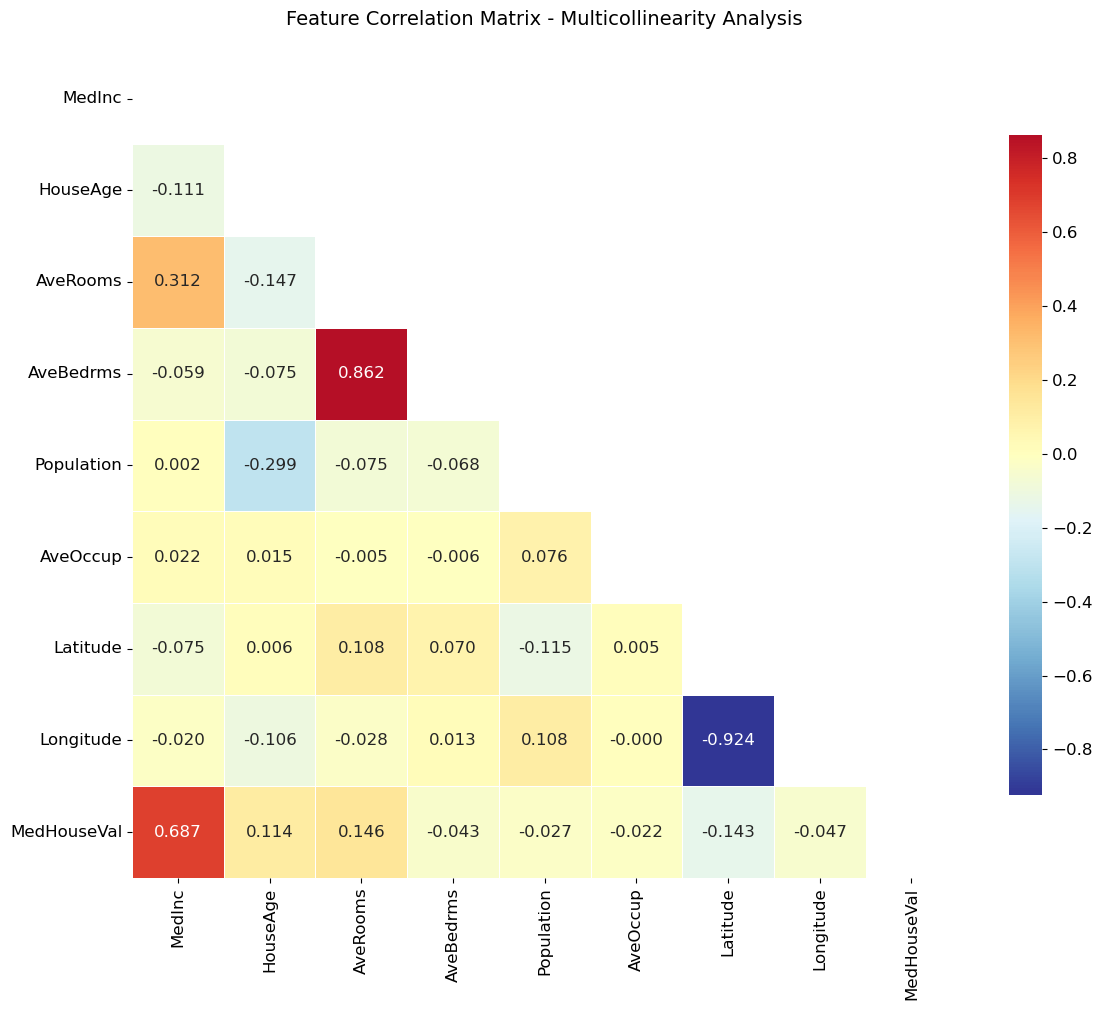


 MULTICOLLINEARITY ANALYSIS:
HIGH: AveRooms <-> AveBedrms: 0.862
HIGH: Latitude <-> Longitude: -0.924

FEATURE REDUNDANCY ASSESSMENT:
Feature ranking by target correlation:
 1. 🔴 Critical MedInc         : 0.687
 2. 🟡 Moderate AveRooms       : 0.146
 3. 🟡 Moderate Latitude       : 0.143
 4. 🟡 Moderate HouseAge       : 0.114
 5. ⚪ Weak Longitude      : 0.047
 6. ⚪ Weak AveBedrms      : 0.043
 7. ⚪ Weak Population     : 0.027
 8. ⚪ Weak AveOccup       : 0.022


In [25]:
# Comprehensive correlation matrix analysis
print("MULTIVARIATE CORRELATION ANALYSIS")
print("=" * 50)

# Create full correlation matrix
correlation_matrix = eda_data.corr()

# Enhanced correlation heatmap with annotations
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Hide upper triangle

# Create heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5)

plt.title('Feature Correlation Matrix - Multicollinearity Analysis', fontsize=14, pad=20)
fig.savefig("outputs/feature_correlation_matrix.png", dpi = 300)
plt.tight_layout()
plt.show()

# Identify multicollinearity issues
print(f"\n MULTICOLLINEARITY ANALYSIS:")
print("=" * 35)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i] 
        feature2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        
        # Skip target variable analysis (already done)
        if feature1 == 'MedHouseVal' or feature2 == 'MedHouseVal':
            continue
            
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((feature1, feature2, corr_val))
            print(f"HIGH: {feature1} <-> {feature2}: {corr_val:.3f}")
        elif abs(corr_val) > 0.5:
            high_corr_pairs.append((feature1, feature2, corr_val))
            print(f"MODERATE: {feature1} <-> {feature2}: {corr_val:.3f}")

if not high_corr_pairs:
    print("✅ No significant multicollinearity detected (all correlations < 0.5)")

# Feature redundancy analysis
print(f"\nFEATURE REDUNDANCY ASSESSMENT:")
print("=" * 40)
feature_importance_proxy = abs(correlation_matrix['MedHouseVal']).drop('MedHouseVal').sort_values(ascending=False)

print("Feature ranking by target correlation:")
for i, (feature, importance) in enumerate(feature_importance_proxy.items(), 1):
    if importance > 0.5:
        status = "🔴 Critical"
    elif importance > 0.3:
        status = "🟠 Important"  
    elif importance > 0.1:
        status = "🟡 Moderate"
    else:
        status = "⚪ Weak"
    
    print(f"{i:2}. {status} {feature:<15}: {importance:.3f}")

### 3.7 Expermenting with Attribute Combinations
- **Feature engineering opportunities** - Ratio features, combinations
- **Model selection insights** - Linear vs tree-based algorithms

In [26]:
feature_engineering_candidates = {
    'rooms_per_household': eda_data['AveRooms'] / eda_data['AveOccup'],
    'bedrooms_per_room': eda_data['AveBedrms'] / eda_data['AveRooms'],
    'population_per_household': eda_data['Population'] / eda_data['HouseAge'],
    'income_per_room': eda_data['MedInc'] / eda_data['AveRooms'],
    'rooms_x_income': eda_data['AveRooms'] * eda_data['MedInc'],
    'coastal_indicator': (eda_data['Longitude'] > -122.0).astype(int),
    'high_density': (eda_data['Population'] > eda_data['Population'].quantile(0.8)).astype(int)
}

print("Try different Attribute Combinations:")
for feature_name, feature_values in feature_engineering_candidates.items():
    # Handle potential division by zero or infinity
    feature_values = feature_values.replace([np.inf, -np.inf], np.nan)
    if feature_values.isna().sum() > 0:
        feature_values = feature_values.fillna(feature_values.median())
    
    correlation = feature_values.corr(eda_data['MedHouseVal'])
    print(f"{feature_name}: {correlation.round(3)}")

Try different Attribute Combinations:
rooms_per_household: 0.199
bedrooms_per_room: -0.26
population_per_household: -0.016
income_per_room: 0.674
rooms_x_income: 0.548
coastal_indicator: -0.16
high_density: -0.025


### 3.8 Data Quality & Outlier Analysis

Let's identify and understand outliers that might impact our models.

In [27]:
# Multi-method outlier detection
outlier_methods = {}

# IQR-based outlier detection
def detect_iqr_outliers(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (series < lower_bound) | (series > upper_bound)

# Z-score based outlier detection  
def detect_zscore_outliers(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return z_scores > threshold

# Analyze outliers for each feature
print("Outlier Detection Results:")
print("=" * 25)

outlier_summary = {}
for feature in eda_data.columns:
    if feature != 'MedHouseVal':  
        iqr_outliers = detect_iqr_outliers(eda_data[feature])
        zscore_outliers = detect_zscore_outliers(eda_data[feature])
        
        iqr_count = iqr_outliers.sum()
        zscore_count = zscore_outliers.sum()
        
        outlier_summary[feature] = {
            'iqr_outliers': iqr_count,
            'zscore_outliers': zscore_count,
            'iqr_pct': iqr_count / len(eda_data) * 100,
            'zscore_pct': zscore_count / len(eda_data) * 100
        }
        
        print(f"{feature:<15}:")
        print(f"  IQR method:    {iqr_count:4d} outliers ({iqr_count/len(eda_data)*100:4.1f}%)")
        print(f"  Z-score method: {zscore_count:4d} outliers ({zscore_count/len(eda_data)*100:4.1f}%)")
        
        # Flag concerning outlier rates
        if iqr_count / len(eda_data) > 0.1:  # More than 10%
            print(f"High outlier rate detected!")
        print()

Outlier Detection Results:
MedInc         :
  IQR method:     553 outliers ( 3.3%)
  Z-score method:  282 outliers ( 1.7%)

HouseAge       :
  IQR method:       0 outliers ( 0.0%)
  Z-score method:    0 outliers ( 0.0%)

AveRooms       :
  IQR method:     413 outliers ( 2.5%)
  Z-score method:  110 outliers ( 0.7%)

AveBedrms      :
  IQR method:    1149 outliers ( 7.0%)
  Z-score method:  116 outliers ( 0.7%)

Population     :
  IQR method:     962 outliers ( 5.8%)
  Z-score method:  276 outliers ( 1.7%)

AveOccup       :
  IQR method:     583 outliers ( 3.5%)
  Z-score method:    6 outliers ( 0.0%)

Latitude       :
  IQR method:       0 outliers ( 0.0%)
  Z-score method:    0 outliers ( 0.0%)

Longitude      :
  IQR method:       0 outliers ( 0.0%)
  Z-score method:    0 outliers ( 0.0%)



### 3.8 EDA Summary & Insights

Let's consolidate our findings and prepare recommendations for preprocessing and modeling.

In [28]:
# Comprehensive EDA summary and insights
print("EDA SUMMARY & KEY INSIGHTS")
print("=" * 50)

print("TOP PREDICTIVE FEATURES:")
print("=" * 30)
for i, (feature, correlation) in enumerate(target_corr.head(3).items(), 1):
    print(f"{i}. {feature}: {correlation:.3f} correlation")

print(f"\nFEATURE ENGINEERING OPPORTUNITIES:")
print("=" * 40)
print("rooms_per_household: Ratio feature showing strong correlation")
print("income_per_room: Combines top predictors")

print(f"\nDATA QUALITY ASSESSMENT:")
print("=" * 30)
print(f"No missing values detected")
print(f"All numerical features (good for regression)")
print(f"Some features highly skewed (need transformation)")
print(f"Outliers present")
print(f"No severe multicollinearity detected")

print(f"\nMODELING INSIGHTS:")
print("=" * 20)
print(f"Strong linear relationships: MedInc, AveRooms")
print(f"Geographic patterns: Location-based features valuable")
print(f"Non-linear patterns: Tree-based models may excel")  
print(f"Scale differences: Feature scaling required")
print(f"Outliers: Consider robust algorithms or capping")

print(f"\nNEXT STEPS - DATA PREPROCESSING:")
print("=" * 35)
print(f"1. Feature engineering")
print(f"2. Feature scaling (StandardScaler)")
print(f"3. Handle skewed distributions (log transform if needed)")
print(f"4. Create preprocessing pipeline")
print(f"5. Validate transformations")


print(f"\nEDA COMPLETE - Ready for Data Preprocessing Phase!")

EDA SUMMARY & KEY INSIGHTS
TOP PREDICTIVE FEATURES:
1. MedInc: 0.687 correlation
2. AveRooms: 0.146 correlation
3. Latitude: -0.143 correlation

FEATURE ENGINEERING OPPORTUNITIES:
rooms_per_household: Ratio feature showing strong correlation
income_per_room: Combines top predictors

DATA QUALITY ASSESSMENT:
No missing values detected
All numerical features (good for regression)
Some features highly skewed (need transformation)
Outliers present
No severe multicollinearity detected

MODELING INSIGHTS:
Strong linear relationships: MedInc, AveRooms
Geographic patterns: Location-based features valuable
Non-linear patterns: Tree-based models may excel
Scale differences: Feature scaling required
Outliers: Consider robust algorithms or capping

NEXT STEPS - DATA PREPROCESSING:
1. Feature engineering
2. Feature scaling (StandardScaler)
3. Handle skewed distributions (log transform if needed)
4. Create preprocessing pipeline
5. Validate transformations

EDA COMPLETE - Ready for Data Preprocessin